<a href="https://colab.research.google.com/github/Natashaxixi/DataScienceProject250303/blob/main/Analyzing_King_County_House_Prices_Using_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")

print("Path to dataset files:", path)

100%|██████████| 780k/780k [00:00<00:00, 24.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/harlfoxem/housesalesprediction/versions/1


In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("harlfoxem/housesalesprediction")
print("Path to dataset files:", path)

# Load the dataset from the downloaded path
dataset_path = f"{path}/kc_house_data.csv"  # Append the file name to the path
df = pd.read_csv(dataset_path)

# Display the first few rows to confirm loading
df.head()

Path to dataset files: /root/.cache/kagglehub/datasets/harlfoxem/housesalesprediction/versions/1


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
# Display data types of each column
print(df.dtypes)

# Screenshot this code and output

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [7]:
# Drop 'id' column with inplace=True
df.drop('id', axis=1, inplace=True)

# Display statistical summary
print(df.describe())

# Screenshot this code and output

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.370842      2.114757   2079.899736  1.510697e+04   
std    3.671272e+05      0.930062      0.770163    918.440897  4.142051e+04   
min    7.500000e+04      0.000000      0.000000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [8]:
# Count unique floor values and convert to DataFrame
floor_counts = df['floors'].value_counts().to_frame()
print(floor_counts)

# Screenshot this code and output

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


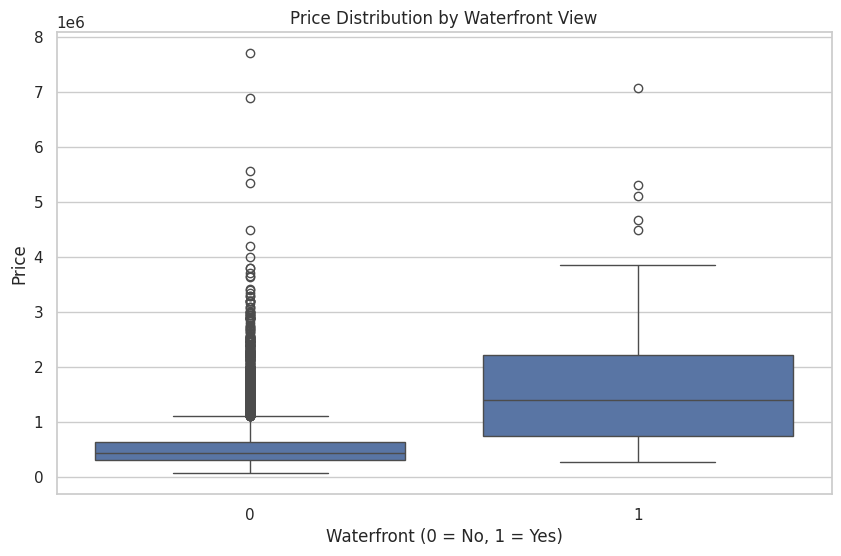

In [9]:
# Set plot style
sns.set(style="whitegrid")

# Create boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Distribution by Waterfront View')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()

# Screenshot this code and plot

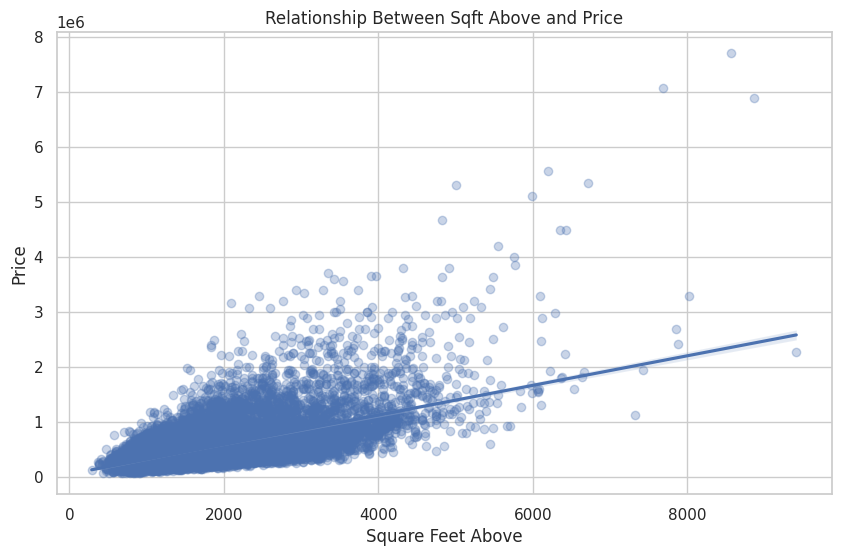

In [10]:
# Create regplot
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_above', y='price', data=df, scatter_kws={'alpha':0.3})
plt.title('Relationship Between Sqft Above and Price')
plt.xlabel('Square Feet Above')
plt.ylabel('Price')
plt.show()

# Screenshot this code and plot

In [11]:
# Define features and target
X = df[['sqft_living']]
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict and calculate R²
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Screenshot this code and R² output

R^2 Score: 0.49406905389089006


In [13]:
# Import necessary libraries (if not already imported)
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define features and target
features = ['floors', 'waterfront', 'lat', 'bedrooms', 'sqft_basement',
            'view', 'bathrooms', 'sqft_living15', 'sqft_above', 'grade', 'sqft_living']
X = df[features]
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('regressor', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict and calculate R²
y_pred_pipeline = pipeline.predict(X_test)
r2_pipeline = r2_score(y_test, y_pred_pipeline)
print(f'R^2 Score with Pipeline: {r2_pipeline}')

# Screenshot this code and R² output

R^2 Score with Pipeline: 0.7114140982349174


In [14]:
# Define features and target
X = df[features]
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit Ridge model
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Predict and calculate R²
y_pred_ridge = ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'R^2 Score with Ridge Regression: {r2_ridge}')

# Screenshot this code and R² output

R^2 Score with Ridge Regression: 0.6614734596866666


In [15]:
# Define features and target
X = df[features]
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform polynomial transformation
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit Ridge model
ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_poly, y_train)

# Predict and calculate R²
y_pred_ridge_poly = ridge_poly.predict(X_test_poly)
r2_ridge_poly = r2_score(y_test, y_pred_ridge_poly)
print(f'R^2 Score with Polynomial Ridge Regression: {r2_ridge_poly}')

# Screenshot this code and R² output

R^2 Score with Polynomial Ridge Regression: 0.7003486858533614
